# Project Specific: Column Selection

In order to reference specific columns in a project's dataset **as input to a task**,
column selection (i.e. feature selection) is required.

*Note: this technique is specifically for when preprocessing or estimation requires or should be
applied to a specific column- not to be confused with feature lists, which allow an entire blueprint
to make use of a subset of a project's features.*

The following demonstrates how to select a specific
column from a project's dataset and use it in a blueprint.

*Selecting multiple columns or specifically excluding columns, to be used as input to a specific
 task is still being tested / validated, and will be added soon.*

In [1]:
import datarobot as dr

In [2]:
from datarobot_bp_workshop import Workshop, Visualize

In [4]:
with open('../../../api.token', 'r') as f:
    token = f.read()
    dr.Client(token=token, endpoint='https://app.datarobot.com/api/v2')

## Initialize Workshop with a `project_id`

In [5]:
w = Workshop(project_id='5eb9656901f6bb026828f14e')

Please upgrade to the latest version: pip install --upgrade datarobot_bp_workshop


## Select a specific feature

In [13]:
w.Features.Insurance_Type

Single Column Converter, Select Feature: 'Insurance_Type' (SCPICK)

Input Summary: Categorical Data
Output Method: TaskOutputMethod.TRANSFORM
Select Feature: 'Insurance_Type'

Task Parameters:
  column_name (cn) = '496e737572616e63655f54797065'

In [7]:
w.Feature('Insurance_Duration')

Single Column Converter: 'Insurance_Duration' (SCPICK)

Input Summary: Categorical Data
Output Method: TaskOutputMethod.TRANSFORM

Task Parameters:
  column_name (cn) = '496e737572616e63655f4475726174696f6e'

## Select multiple features
This can be done either by using `w.Features.<feature name>` (to leverage autocomplete)
or `'<feature name>'` as shown below.

Note: all features must be the same input data type

In [14]:
w.FeatureSelection(w.Features.Insurance_Duration, w.Features.Insurance_Type)

Multiple Column Selector, Select Features: 'Insurance_Duration', 'Insurance_Type' (MCPICK)

Input Summary: Categorical Data
Output Method: TaskOutputMethod.TRANSFORM
Select Features: 'Insurance_Duration', 'Insurance_Type'

Task Parameters:
  column_names (cns) = ['496e737572616e63655f4475726174696f6e', '496e737572616e63655f54797065']
  method (method) = 'include'

In [15]:
w.FeatureSelection('Insurance_Duration', 'Insurance_Type')

Multiple Column Selector, Select Features: 'Insurance_Duration', 'Insurance_Type' (MCPICK)

Input Summary: Categorical Data
Output Method: TaskOutputMethod.TRANSFORM
Select Features: 'Insurance_Duration', 'Insurance_Type'

Task Parameters:
  column_names (cns) = ['496e737572616e63655f4475726174696f6e', '496e737572616e63655f54797065']
  method (method) = 'include'

Features may also be excluded instead, which will select all other features of the same type.

In [16]:
w.FeatureSelection('Insurance_Duration', 'Insurance_Type', exclude=True)

Multiple Column Selector, Exclude Features: 'Insurance_Duration', 'Insurance_Type' (MCPICK)

Input Summary: Categorical Data
Output Method: TaskOutputMethod.TRANSFORM
Exclude Features: 'Insurance_Duration', 'Insurance_Type'

Task Parameters:
  column_names (cns) = ['496e737572616e63655f4475726174696f6e', '496e737572616e63655f54797065']
  method (method) = 'exclude'

## Build a blueprint with a specific feature

In [8]:
pni = w.Tasks.PNI2(w.Features.Age)
rdt = w.Tasks.RDT5(pni)
binning = w.Tasks.BINNING(pni)
keras = w.Tasks.KERASC(rdt, binning)
keras.set_task_parameters_by_name(learning_rate=0.123)
keras_blueprint = w.BlueprintGraph(keras, name='A blueprint I made with the Python API')

In [9]:
source_code = keras_blueprint.to_source_code(to_stdout=True)

w = Workshop(project_id='5eb9656901f6bb026828f14e')

age = w.Features.Age

pni2 = w.Tasks.PNI2(age)

binning = w.Tasks.BINNING(pni2)

rdt5 = w.Tasks.RDT5(pni2)

kerasc = w.Tasks.KERASC(binning, rdt5)
kerasc.set_task_parameters(learning_rate=0.123)

kerasc_blueprint = w.BlueprintGraph(kerasc, name='A blueprint I made with the Python API')


In [10]:
exec(compile(source_code, 'blueprint', 'exec'), locals())

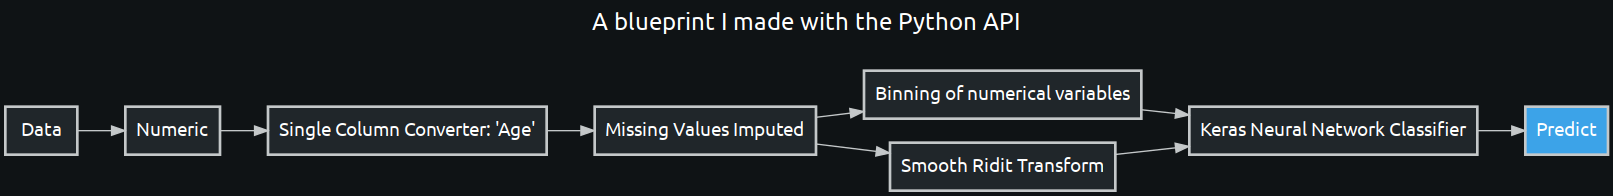

In [11]:
kerasc_blueprint.show()

In [12]:
w.set_project(project_id='605ab63ecd8a6669dfd64901')

In [14]:
kerasc_blueprint.train(w.project.id)

Name: 'A blueprint I made with the Python API'

Input Data: Numeric
Tasks: Single Column Converter: 'Age' | Missing Values Imputed | Binning of numerical variables | Smooth Ridit Transform | Keras Neural Network Classifier

In [101]:
starred_models = w.project.get_models(search_params=dict(is_starred=True))

In [102]:
model_to_clone = starred_models[0].blueprint_id

In [104]:
bp = w.clone(blueprint_id=model_to_clone, name='Now featuring selected columns!')

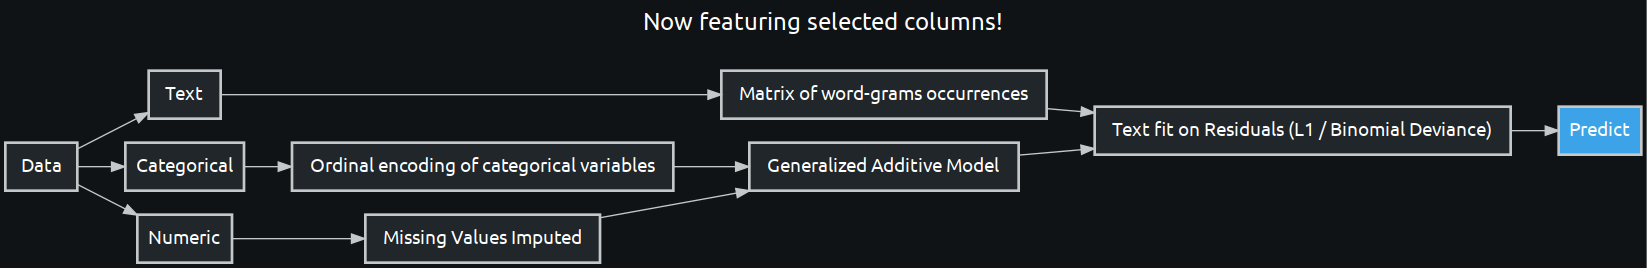

In [105]:
bp.show()

In [106]:
bp.delete()

Blueprint deleted.
